Tujuan : Mengklasifikasikan minuman berdasarkan skor Nutri-Score. Nutri-Score adalah sistem label nutrisi yang mengklasifikasikan minuman dari A (terbaik) ke E (terburuk) berdasarkan nilai nutrisi per 100 ml, seperti kandungan energi, lemak, gula, garam, serat, dan protein.


**Dataset**
---

Pengumpulan data berdasarkan scraping dari situs Open Food Facts



In [44]:
import pandas as pd

url = "https://raw.githubusercontent.com/nabhylanr/ML-NutriScore/main/minuman.csv"
df = pd.read_csv(url)

df.head()

,Kategori,Nama_minuman,Nutri_Score,Energy (Per 100 ml),Fat (Per 100 ml),Saturated fat (Per 100 ml),Carbohydrates (Per 100 ml),Sugars (Per 100 ml),Fiber (Per 100 ml),Proteins (Per 100 ml),Salt (Per 100 ml)
0,fruit-juices,Cappy pulpy,e,155.0,0.0,0.0,9.0,7.0,NaN,0.0,0.050000
1,fruit-juices,PRESSup,c,226.0,0.1,0.0,13.0,5.5,0.1,0.4,0.000003
2,fruit-juices,Press up,c,226.0,0.1,0.0,13.0,5.5,0.1,0.4,0.002500
3,fruit-juices,Shot de gingembre bio,c,142.0,0.5,0.1,7.9,7.6,0.0,0.5,0.010000
4,fruit-juices,Jutos,d,66.8,0.0,0.0,10.0,8.0,0.0,0.0,0.050000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Kategori                    811 non-null    object 
 1   Nama_minuman                800 non-null    object 
 2   Nutri_Score                 811 non-null    object 
 3   Energy (Per 100 ml)         811 non-null    float64
 4   Fat (Per 100 ml)            811 non-null    float64
 5   Saturated fat (Per 100 ml)  776 non-null    float64
 6   Carbohydrates (Per 100 ml)  810 non-null    float64
 7   Sugars (Per 100 ml)         803 non-null    float64
 8   Fiber (Per 100 ml)          510 non-null    float64
 9   Proteins (Per 100 ml)       811 non-null    float64
 10  Salt (Per 100 ml)           811 non-null    float64
dtypes: float64(8), object(3)
memory usage: 69.8+ KB


**Data Preprocessing**
---

Cleaning Data
---

In [70]:
print("Jumlah awal data:", len(df))
print("Jumlah kolom dengan NaN:\n", df.isna().sum())

df.drop_duplicates(inplace=True)
df.replace("", pd.NA, inplace=True)

df = df[df["Nama_minuman"].notna()]
df = df[df["Nama_minuman"].str.strip() != ""]

nutrisi_cols = [
    "Energy (Per 100 ml)", "Fat (Per 100 ml)", "Saturated fat (Per 100 ml)",
    "Carbohydrates (Per 100 ml)", "Sugars (Per 100 ml)", "Fiber (Per 100 ml)",
    "Proteins (Per 100 ml)", "Salt (Per 100 ml)"
]
df[nutrisi_cols] = df[nutrisi_cols].apply(pd.to_numeric, errors='coerce')

df = df[df[nutrisi_cols].isna().mean(axis=1) < 0.5]

df.reset_index(drop=True, inplace=True)
df.to_csv("minuman_clean.csv", index=False, encoding="utf-8-sig")

print("Jumlah akhir data:", len(df))

Jumlah awal data: 798
Jumlah kolom dengan NaN:
 Kategori                      0
Nama_minuman                  0
Nutri_Score                   0
Energy (Per 100 ml)           0
Fat (Per 100 ml)              0
Saturated fat (Per 100 ml)    0
Carbohydrates (Per 100 ml)    0
Sugars (Per 100 ml)           0
Fiber (Per 100 ml)            0
Proteins (Per 100 ml)         0
Salt (Per 100 ml)             0
dtype: int64
Jumlah akhir data: 798


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Kategori                    798 non-null    object 
 1   Nama_minuman                798 non-null    object 
 2   Nutri_Score                 798 non-null    object 
 3   Energy (Per 100 ml)         798 non-null    float64
 4   Fat (Per 100 ml)            798 non-null    float64
 5   Saturated fat (Per 100 ml)  798 non-null    float64
 6   Carbohydrates (Per 100 ml)  798 non-null    float64
 7   Sugars (Per 100 ml)         798 non-null    float64
 8   Fiber (Per 100 ml)          798 non-null    float64
 9   Proteins (Per 100 ml)       798 non-null    float64
 10  Salt (Per 100 ml)           798 non-null    float64
dtypes: float64(8), object(3)
memory usage: 68.7+ KB


In [72]:
df.head()

,Kategori,Nama_minuman,Nutri_Score,Energy (Per 100 ml),Fat (Per 100 ml),Saturated fat (Per 100 ml),Carbohydrates (Per 100 ml),Sugars (Per 100 ml),Fiber (Per 100 ml),Proteins (Per 100 ml),Salt (Per 100 ml)
0,fruit-juices,Cappy pulpy,e,155.0,0.0,0.0,9.0,7.0,1.222248e+10,0.0,0.050000
1,fruit-juices,PRESSup,c,226.0,0.1,0.0,13.0,5.5,1.000000e-01,0.4,0.000003
2,fruit-juices,Press up,c,226.0,0.1,0.0,13.0,5.5,1.000000e-01,0.4,0.002500
3,fruit-juices,Shot de gingembre bio,c,142.0,0.5,0.1,7.9,7.6,0.000000e+00,0.5,0.010000
4,fruit-juices,Jutos,d,66.8,0.0,0.0,10.0,8.0,0.000000e+00,0.0,0.050000


Missing Value
---

In [73]:
misval_cek = {
    'Missing Values':df.isnull().sum(),
    'Missing Values (%)': ((df.isnull().sum()/df.shape[0]).round(2)*100),
    'Data Type': df.dtypes
    }

misval=pd.DataFrame(misval_cek)
misval

,Missing Values,Missing Values (%),Data Type
Kategori,0,0.0,object
Nama_minuman,0,0.0,object
Nutri_Score,0,0.0,object
Energy (Per 100 ml),0,0.0,float64
Fat (Per 100 ml),0,0.0,float64
Saturated fat (Per 100 ml),0,0.0,float64
Carbohydrates (Per 100 ml),0,0.0,float64
Sugars (Per 100 ml),0,0.0,float64
Fiber (Per 100 ml),0,0.0,float64
Proteins (Per 100 ml),0,0.0,float64


In [74]:
df.fillna(df.mean(numeric_only=True), inplace=True)

for col in df.select_dtypes(include='object'):
    df[col] = df[col].fillna(df[col].mode()[0])

In [75]:
misval_cek = {
    'Missing Values': df.isnull().sum(),
    'Missing Values (%)': ((df.isnull().sum() / df.shape[0]).round(2) * 100),
    'Data Type': df.dtypes
}

misval = pd.DataFrame(misval_cek)
misval

,Missing Values,Missing Values (%),Data Type
Kategori,0,0.0,object
Nama_minuman,0,0.0,object
Nutri_Score,0,0.0,object
Energy (Per 100 ml),0,0.0,float64
Fat (Per 100 ml),0,0.0,float64
Saturated fat (Per 100 ml),0,0.0,float64
Carbohydrates (Per 100 ml),0,0.0,float64
Sugars (Per 100 ml),0,0.0,float64
Fiber (Per 100 ml),0,0.0,float64
Proteins (Per 100 ml),0,0.0,float64


In [76]:
print(df.isnull().sum())

Kategori                      0
Nama_minuman                  0
Nutri_Score                   0
Energy (Per 100 ml)           0
Fat (Per 100 ml)              0
Saturated fat (Per 100 ml)    0
Carbohydrates (Per 100 ml)    0
Sugars (Per 100 ml)           0
Fiber (Per 100 ml)            0
Proteins (Per 100 ml)         0
Salt (Per 100 ml)             0
dtype: int64


In [77]:
df1=df.copy()

Label Encoding
---

In [78]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df1['Nutri_Score'] = le.fit_transform(df1['Nutri_Score'])

for label, class_ in enumerate(le.classes_):
    print(f"Class {label}: {class_}")

Class 0: b
Class 1: c
Class 2: d
Class 3: e


In [79]:
df2=df1.copy()

Feature Engineering
---

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd

X = df1.drop(columns=["Nutri_Score", "Nama_minuman", "Kategori"])
y = df1["Nutri_Score"]

for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importances = model.feature_importances_
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(importance_df.head(10))

                      Feature  Importance
0         Energy (Per 100 ml)    0.202768
3  Carbohydrates (Per 100 ml)    0.197517
4         Sugars (Per 100 ml)    0.188350
7           Salt (Per 100 ml)    0.111241
6       Proteins (Per 100 ml)    0.106869
1            Fat (Per 100 ml)    0.081662
2  Saturated fat (Per 100 ml)    0.068179
5          Fiber (Per 100 ml)    0.043414


In [81]:
selected_features = importance_df[importance_df["Importance"] > 0.08]["Feature"]
X_filtered = X[selected_features]

df1 = pd.concat([df1[["Nutri_Score", "Nama_minuman", "Kategori"]], X_filtered], axis=1)

df1.head()

,Nutri_Score,Nama_minuman,Kategori,Energy (Per 100 ml),Carbohydrates (Per 100 ml),Sugars (Per 100 ml),Salt (Per 100 ml),Proteins (Per 100 ml),Fat (Per 100 ml)
0,3,Cappy pulpy,fruit-juices,155.0,9.0,7.0,0.050000,0.0,0.0
1,1,PRESSup,fruit-juices,226.0,13.0,5.5,0.000003,0.4,0.1
2,1,Press up,fruit-juices,226.0,13.0,5.5,0.002500,0.4,0.1
3,1,Shot de gingembre bio,fruit-juices,142.0,7.9,7.6,0.010000,0.5,0.5
4,2,Jutos,fruit-juices,66.8,10.0,8.0,0.050000,0.0,0.0


Outlier
---

In [82]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

def plot_box(df1):
    columns_to_plot = ['Energy (Per 100 ml)', 'Fat (Per 100 ml)','Saturated fat (Per 100 ml)', 'Carbohydrates (Per 100 ml)',
                       'Sugars (Per 100 ml)', 'Proteins (Per 100 ml)','Salt (Per 100 ml)']

    n_rows = 3
    n_cols = 3

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))

    if n_rows == 1:
        axes = axes.reshape(1, -1)
    if n_cols == 1:
        axes = axes.reshape(-1, 1)

    for i, column in enumerate(columns_to_plot):
        row_idx = i // n_cols
        col_idx = i % n_cols
        ax = axes[row_idx, col_idx]
        boxplot = df.boxplot(column=[column], ax=ax)
        ax.set_title(column)

    for i in range(len(columns_to_plot), n_rows * n_cols):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()

In [83]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Nutri_Score                 798 non-null    int64  
 1   Nama_minuman                798 non-null    object 
 2   Kategori                    798 non-null    object 
 3   Energy (Per 100 ml)         798 non-null    float64
 4   Carbohydrates (Per 100 ml)  798 non-null    float64
 5   Sugars (Per 100 ml)         798 non-null    float64
 6   Salt (Per 100 ml)           798 non-null    float64
 7   Proteins (Per 100 ml)       798 non-null    float64
 8   Fat (Per 100 ml)            798 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 56.2+ KB


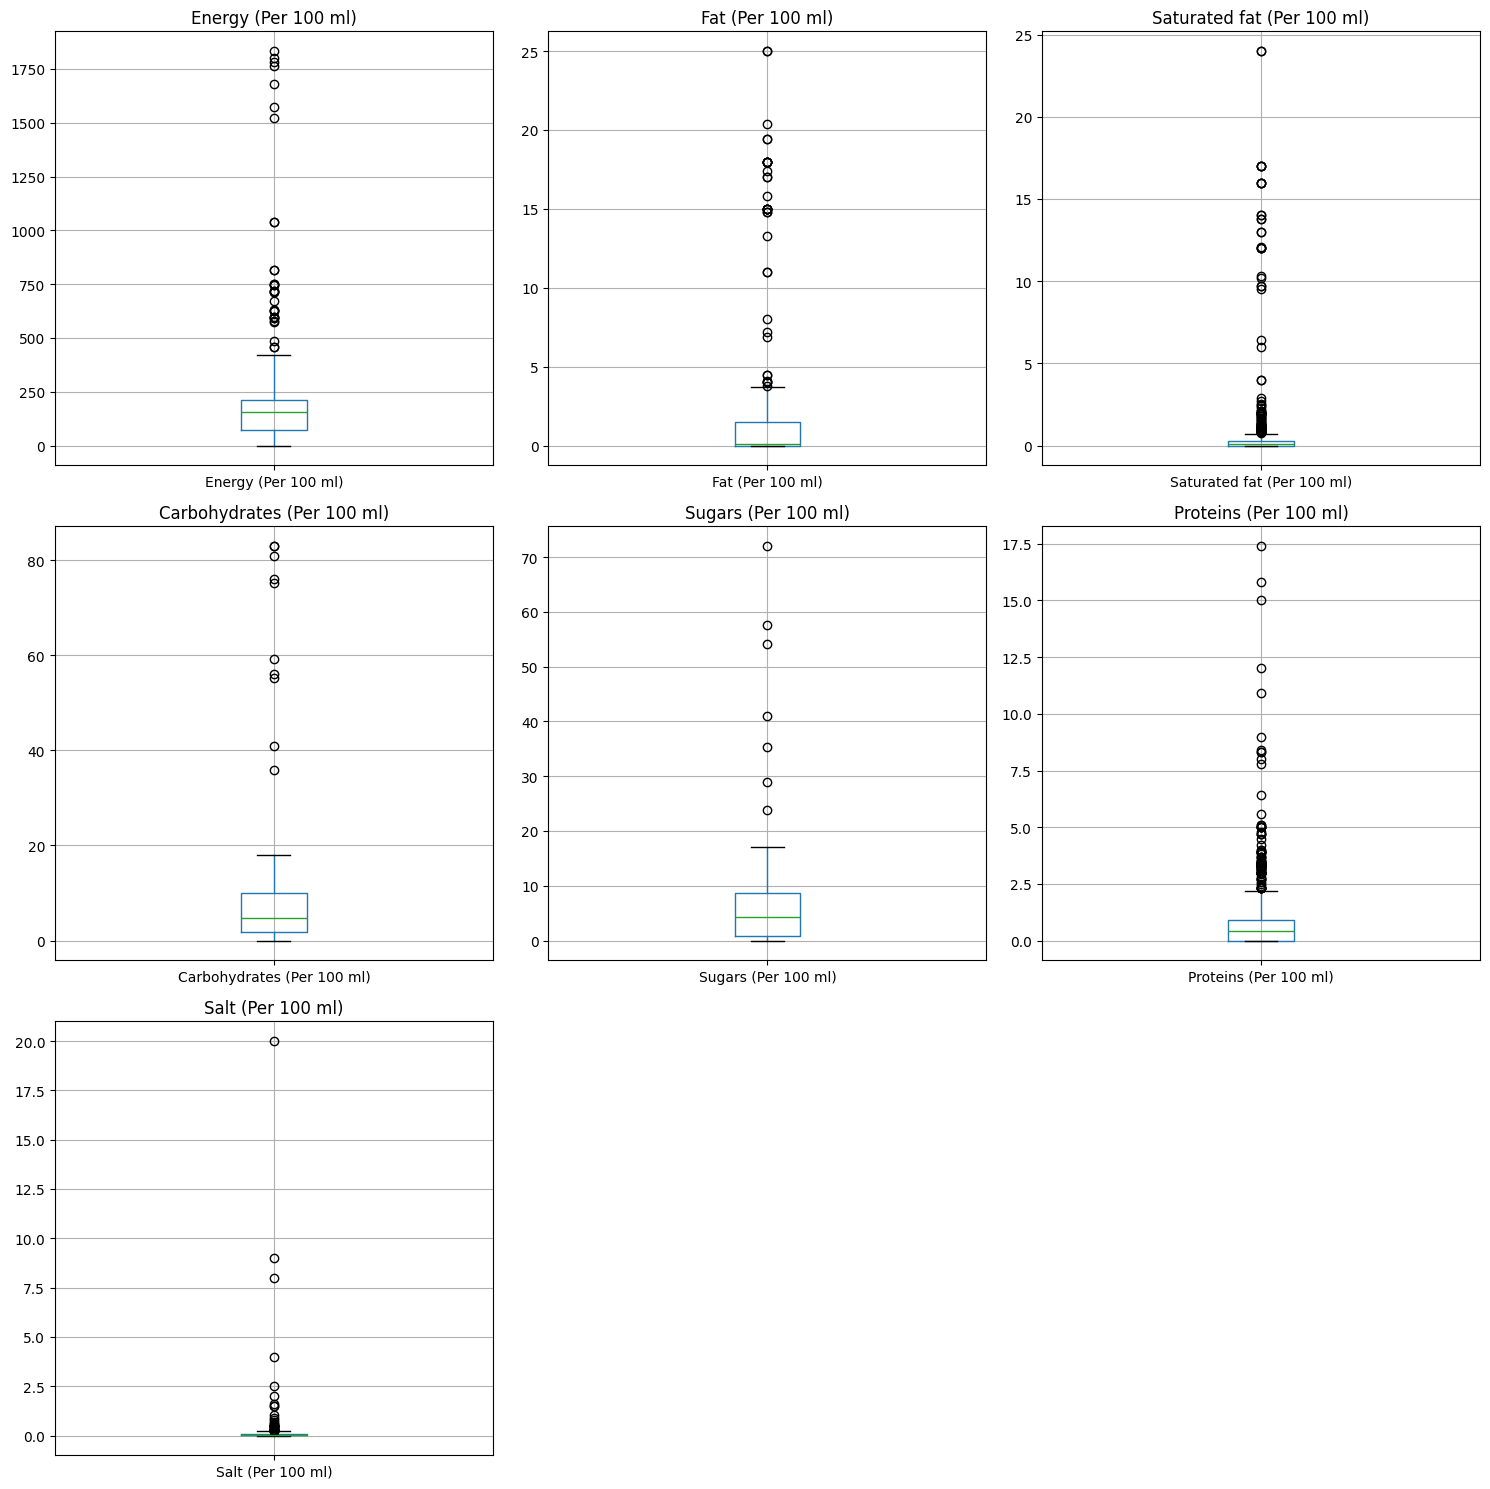

In [84]:
plot_box(df1)

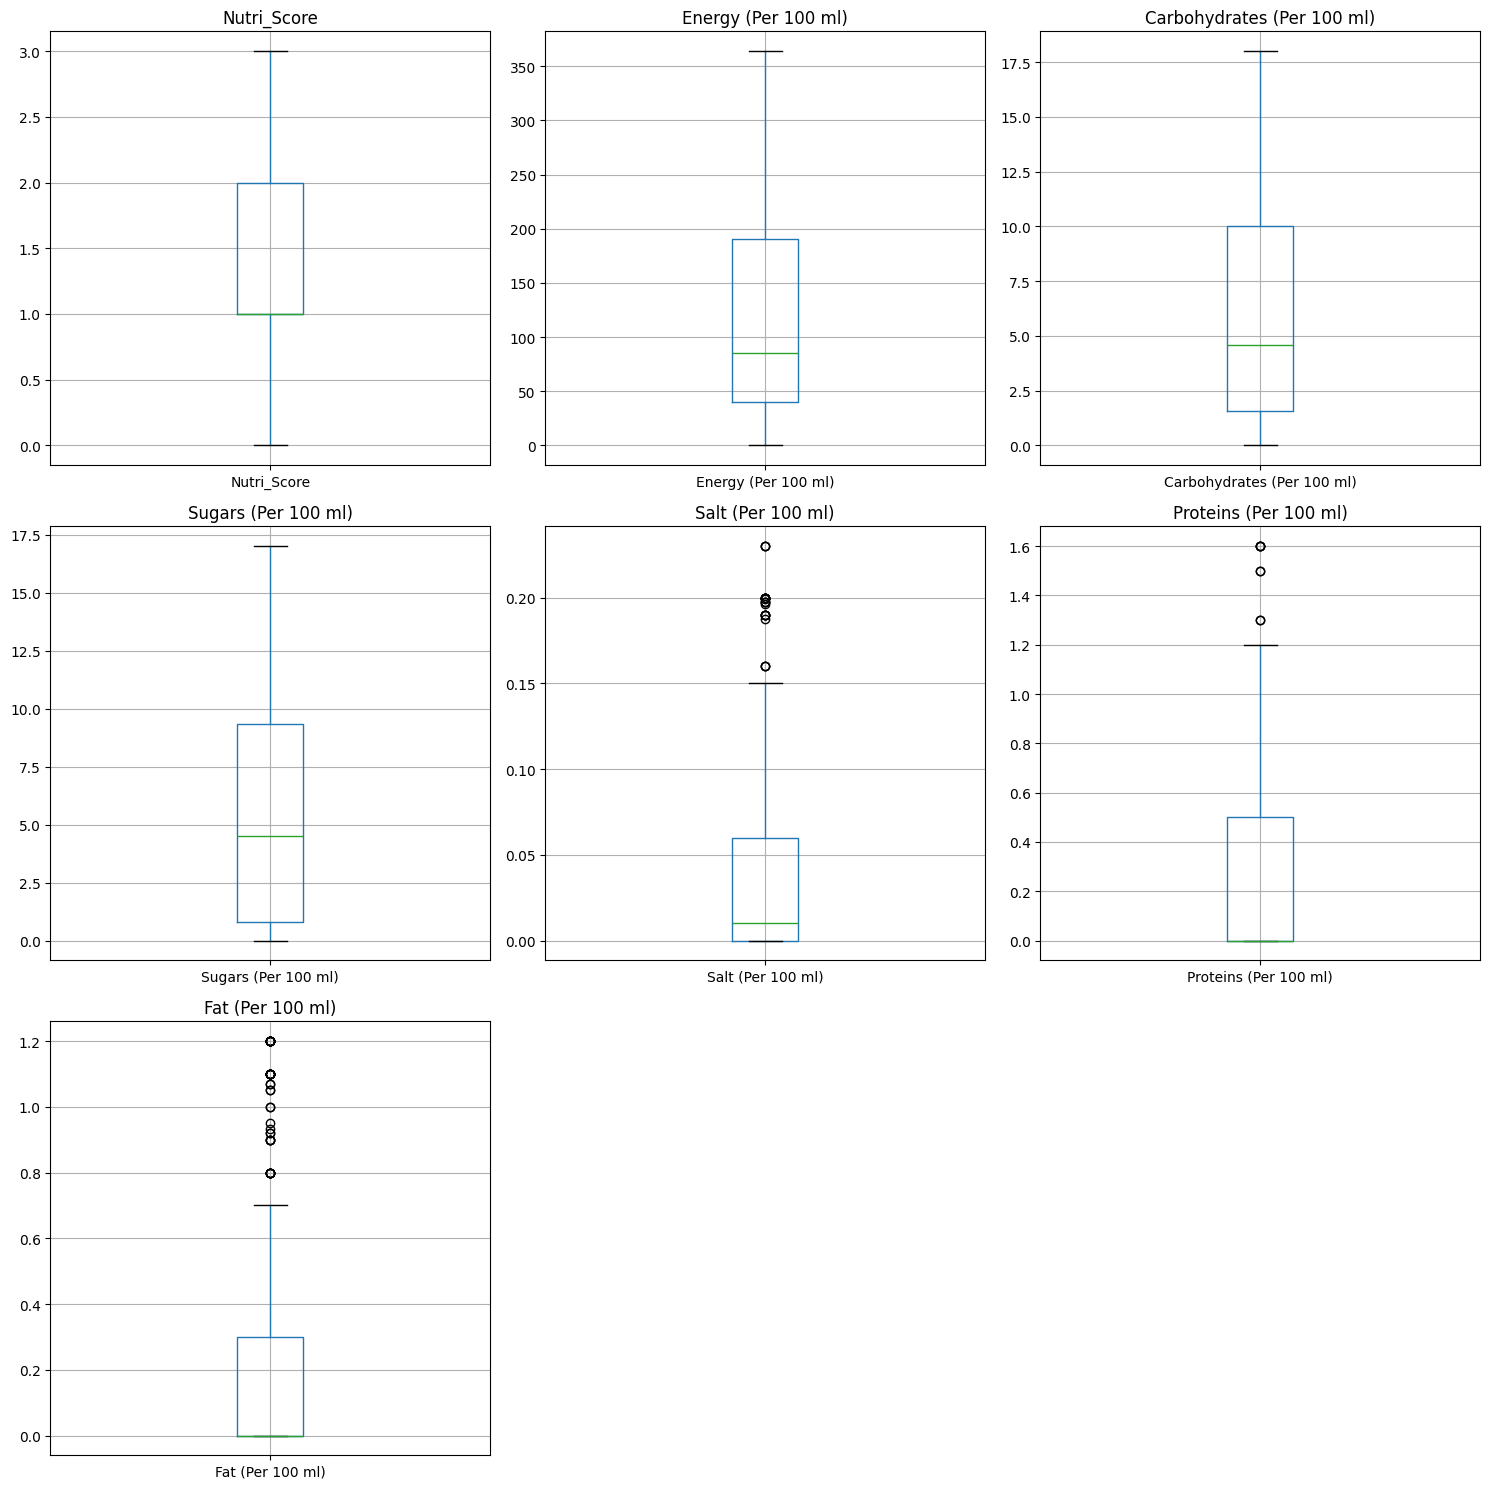

In [85]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

columns_to_check = df1.select_dtypes(include=['float64', 'int64']).columns.tolist()

df1 = remove_outliers_iqr(df1, columns_to_check)

def plot_box(df_to_plot):
    columns_to_plot = df_to_plot.select_dtypes(include=['float64', 'int64']).columns.tolist()

    n_rows = (len(columns_to_plot) + 2) // 3
    n_cols = 3

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

    axes = axes.flatten()

    for i, column in enumerate(columns_to_plot):
        ax = axes[i]
        boxplot = df_to_plot.boxplot(column=[column], ax=ax)
        ax.set_title(column)

    for i in range(len(columns_to_plot), n_rows * n_cols):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

plot_box(df1)

In [86]:
df1.isna().sum()

,0
Nutri_Score,0
Nama_minuman,0
Kategori,0
Energy (Per 100 ml),0
Carbohydrates (Per 100 ml),0
Sugars (Per 100 ml),0
Salt (Per 100 ml),0
Proteins (Per 100 ml),0
Fat (Per 100 ml),0


In [87]:
df1.describe()

,Nutri_Score,Energy (Per 100 ml),Carbohydrates (Per 100 ml),Sugars (Per 100 ml),Salt (Per 100 ml),Proteins (Per 100 ml),Fat (Per 100 ml)
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.00000
mean,1.348485,111.067803,5.769575,5.180951,0.038026,0.228737,0.17856
std,1.008389,82.674864,4.579405,4.232066,0.051830,0.316194,0.32222
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,40.000000,1.592500,0.800000,0.000000,0.000000,0.00000
50%,1.000000,85.050000,4.600000,4.500000,0.010000,0.000000,0.00000
75%,2.000000,191.000000,10.000000,9.347500,0.060000,0.500000,0.30000
max,3.000000,364.000000,18.000000,17.000000,0.230000,1.600000,1.20000


Korelasi Fitur
---

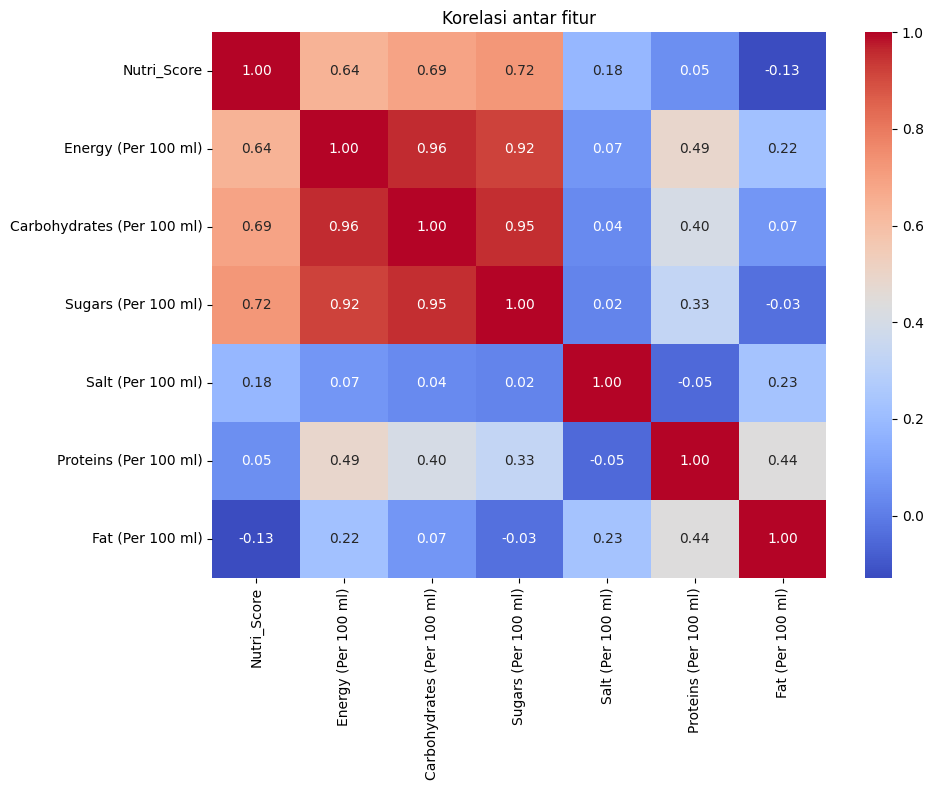

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df1.select_dtypes(include=['float64', 'int64']).columns.tolist()

corr_matrix = df1[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi antar fitur")
plt.tight_layout()
plt.show()

In [89]:
drop_cols = ['Sugars (Per 100 ml)', 'Fat (Per 100 ml)']
df1.drop(columns=drop_cols, inplace=True)

In [90]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 528 entries, 0 to 797
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Nutri_Score                 528 non-null    int64  
 1   Nama_minuman                528 non-null    object 
 2   Kategori                    528 non-null    object 
 3   Energy (Per 100 ml)         528 non-null    float64
 4   Carbohydrates (Per 100 ml)  528 non-null    float64
 5   Salt (Per 100 ml)           528 non-null    float64
 6   Proteins (Per 100 ml)       528 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 33.0+ KB


Barplot
---

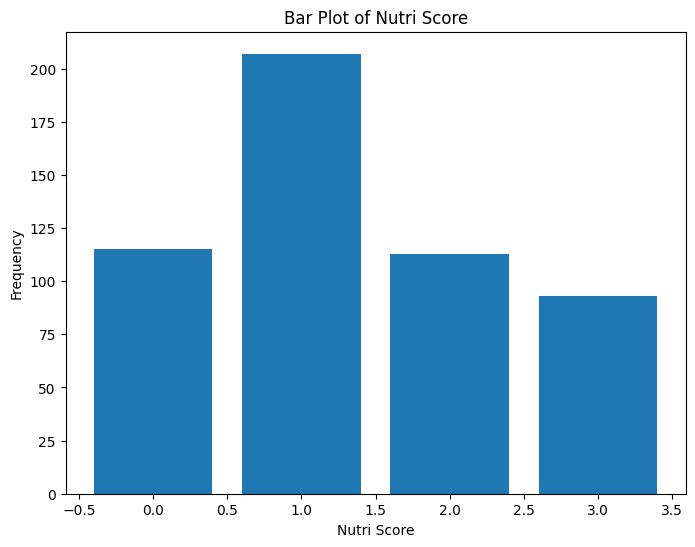

In [91]:
import matplotlib.pyplot as plt

label = df1['Nutri_Score']

value_counts = label.value_counts()
sorted_index = value_counts.index.sort_values()

plt.figure(figsize=(8, 6))
plt.bar(sorted_index, value_counts[sorted_index])
plt.xlabel('Nutri Score')
plt.ylabel('Frequency')
plt.title('Bar Plot of Nutri Score')
plt.show()

Scalling Data
---

In [92]:
from sklearn.preprocessing import MinMaxScaler

excluded_cols = ['Nutri_Score', 'Nama Minuman', 'Kategori']

numeric_cols = df1.select_dtypes(include=['float64', 'int64']).columns.difference(excluded_cols)

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df1[numeric_cols])

scaled_df = pd.DataFrame(scaled, columns=numeric_cols, index=df1.index)

df1 = pd.concat([df1.drop(columns=numeric_cols), scaled_df], axis=1)

In [93]:
df1.head()

,Nutri_Score,Nama_minuman,Kategori,Carbohydrates (Per 100 ml),Energy (Per 100 ml),Proteins (Per 100 ml),Salt (Per 100 ml)
0,3,Cappy pulpy,fruit-juices,0.500000,0.425824,0.0000,0.217391
1,1,PRESSup,fruit-juices,0.722222,0.620879,0.2500,0.000011
2,1,Press up,fruit-juices,0.722222,0.620879,0.2500,0.010870
3,1,Shot de gingembre bio,fruit-juices,0.438889,0.390110,0.3125,0.043478
4,2,Jutos,fruit-juices,0.555556,0.183516,0.0000,0.217391


Splitting Data
---

In [94]:
from sklearn.model_selection import train_test_split

X = df1.drop(['Nutri_Score', 'Nama_minuman', 'Kategori'], axis=True)
y = df1['Nutri_Score']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [95]:
print(df1['Nutri_Score'].value_counts(normalize=True))

Nutri_Score
1    0.392045
0    0.217803
2    0.214015
3    0.176136
Name: proportion, dtype: float64


**Training Model**
---

Decision Tree
---
Nabhyla Niagara (5025221286)


In [102]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

dtc_model = DecisionTreeClassifier(criterion='gini', random_state=42,max_depth=9)
dtc_model.fit(x_train, y_train)

# predict
y_pred_dtc = dtc_model.predict(x_test)

# accuracy
accuracy = round(accuracy_score(y_test, y_pred_dtc), 4) * 100
print(f"Akurasi Model: {accuracy}%")

Akurasi Model: 74.83999999999999%


In [101]:
# max depth optimal
for i in [5,7,9,11,13,15,17,19,21]:
    check = DecisionTreeClassifier(criterion='gini',random_state=42, max_depth=i)
    check.fit(x_train, y_train)
    y_pred_check= check.predict(x_test)
    print(f"Akurasi max depth {i} = {accuracy_score(y_test,y_pred_check)}")

Akurasi max depth 5 = 0.6540880503144654
Akurasi max depth 7 = 0.6981132075471698
Akurasi max depth 9 = 0.7484276729559748
Akurasi max depth 11 = 0.7169811320754716
Akurasi max depth 13 = 0.7295597484276729
Akurasi max depth 15 = 0.7295597484276729
Akurasi max depth 17 = 0.7169811320754716
Akurasi max depth 19 = 0.7169811320754716
Akurasi max depth 21 = 0.7169811320754716


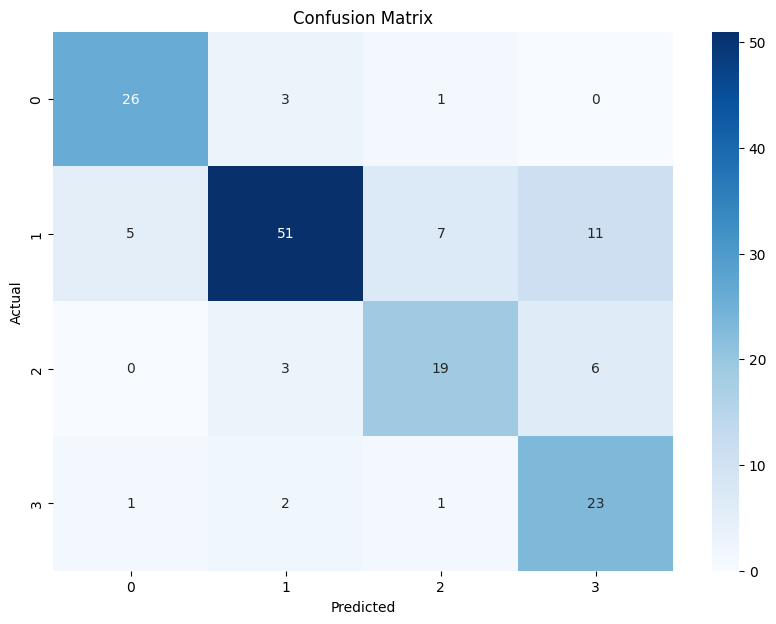

In [103]:
cm = confusion_matrix(y_test, y_pred_dtc)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [104]:
accuracy = accuracy_score(y_test, y_pred_dtc)
precision = precision_score(y_test, y_pred_dtc, average='macro')
recall = recall_score(y_test, y_pred_dtc, average='macro')
f1 = f1_score(y_test, y_pred_dtc, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.7484276729559748
Precision: 0.7326195520581114
Recall: 0.7715697840697842
F1-Score: 0.7427


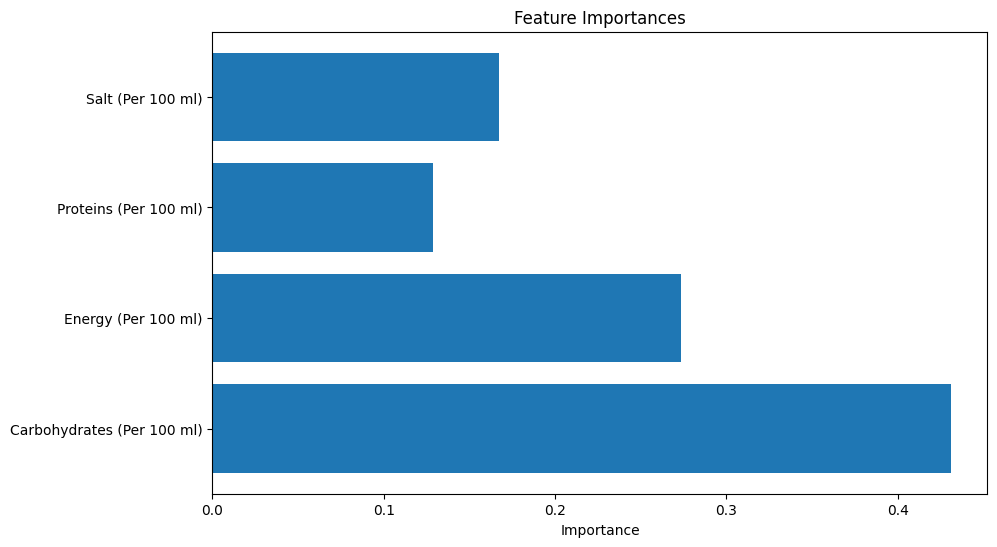

In [105]:
feature_importances = dtc_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances, align='center')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()